In [178]:
import pandas as pd

In [179]:
cars_df = pd.read_csv("cars-dataset.csv")

In [180]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [181]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [182]:
cars_df.shape

(398, 8)

hp is a object type we need to conver to to int

"car name" and yr are categorical variables

In [183]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [184]:
cars_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [185]:
#cars_df['hp'] = cars_df['hp'].astype(int)
cars_df['hp'] = pd.to_numeric(cars_df['hp'], errors='coerce')

In [186]:
cars_df.hp.isnull().sum()

6

In [187]:
cars_df.hp.fillna(104,inplace=True)

In [188]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.462312,38.199230,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [189]:
cars_df['car name'] = cars_df['car name'].astype('category')

In [190]:
#cars_df['yr'] = cars_df['yr'].astype('category')

In [191]:
cars_df.dtypes

car name    category
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
mpg          float64
dtype: object

In [192]:
cars_df['car name'].value_counts()

ford pinto                           6
toyota corolla                       5
ford maverick                        5
amc matador                          5
amc gremlin                          4
peugeot 504                          4
toyota corona                        4
amc hornet                           4
chevrolet chevette                   4
chevrolet impala                     4
chevrolet nova                       3
plymouth fury iii                    3
dodge colt                           3
chevrolet caprice classic            3
volkswagen dasher                    3
ford gran torino                     3
chevrolet vega                       3
pontiac catalina                     3
honda civic                          3
ford galaxie 500                     3
chevrolet citation                   3
plymouth duster                      3
honda accord                         2
saab 99le                            2
buick skylark                        2
subaru                   

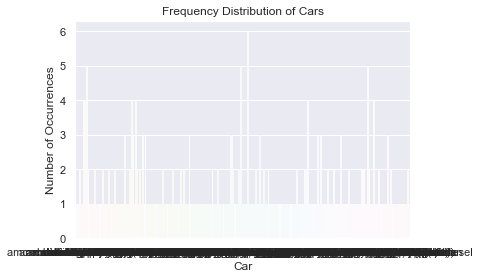

In [193]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
car_count = cars_df['car name'].value_counts()
sns.set(style="darkgrid")
sns.barplot(car_count.index, car_count.values, alpha=0.9)
plt.title('Frequency Distribution of Cars')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car', fontsize=12)
plt.show()

In [194]:
cars_df_onehot = cars_df.copy()
cars_df_onehot = pd.get_dummies(cars_df_onehot, columns=['car name'], prefix = ['yr'])


In [195]:
cars_df_onehot.head()

,cyl,disp,hp,wt,acc,yr,mpg,yr_amc ambassador brougham,yr_amc ambassador dpl,yr_amc ambassador sst,...,yr_volvo 145e (sw),yr_volvo 244dl,yr_volvo 245,yr_volvo 264gl,yr_volvo diesel,yr_vw dasher (diesel),yr_vw pickup,yr_vw rabbit,yr_vw rabbit c (diesel),yr_vw rabbit custom
0,8,307.0,130.0,3504,12.0,70,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165.0,3693,11.5,70,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150.0,3436,11.0,70,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,304.0,150.0,3433,12.0,70,16.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140.0,3449,10.5,70,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
cars_df_onehot.shape

(398, 312)

In [197]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [198]:
cars_df.iloc[:,1:].isnull().count()

cyl     398
disp    398
hp      398
wt      398
acc     398
yr      398
mpg     398
dtype: int64

In [199]:
ndf=cars_df.iloc[:,1:]
ndf.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [200]:
ndf.hp.dtype

dtype('float64')

C:\Users\kotav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


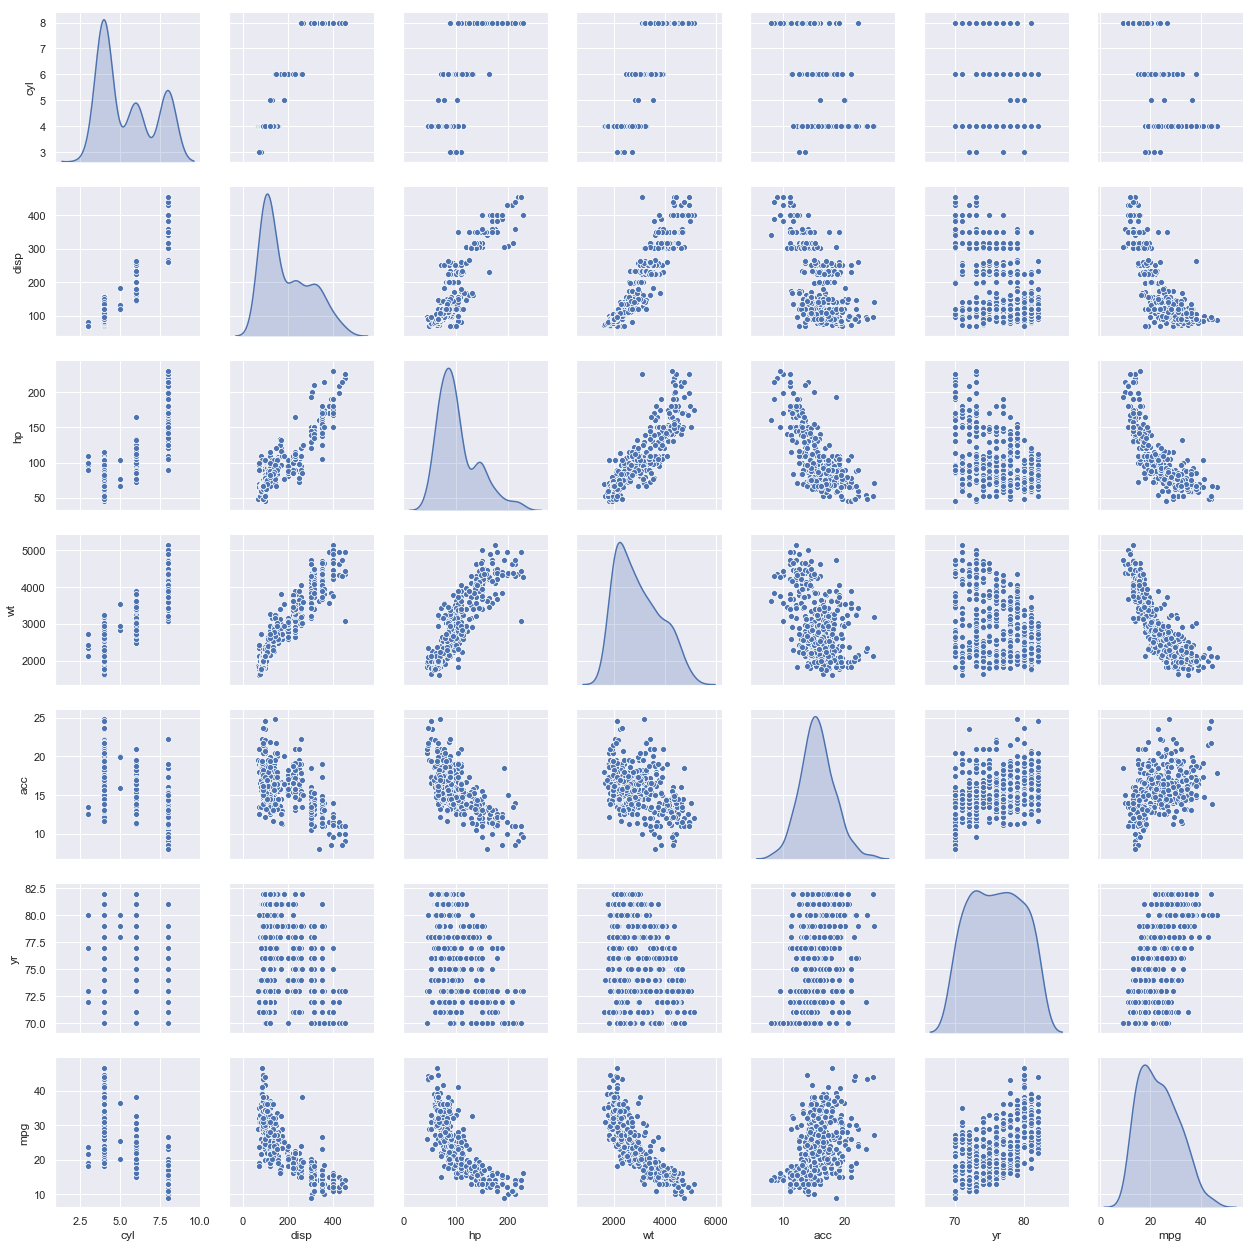

In [201]:
sns.pairplot(ndf,diag_kind='kde')


Interpretation from pair plot
1. cylinder has 3 categories
2. displacement might also have 3 categories
3. AS hp and weight increases displacement also increases
4. horse power and acceleration are inversely proportional


In [202]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(ndf[['cyl', 'disp', 'hp']])
ndf['k_3'] = km.predict(ndf[['cyl', 'disp', 'hp']])

In [203]:
km.cluster_centers_

array([[  6.10714286, 225.14285714, 101.44047619],
       [  8.        , 349.25510204, 160.81632653],
       [  4.0462963 , 110.3912037 ,  80.06944444]])

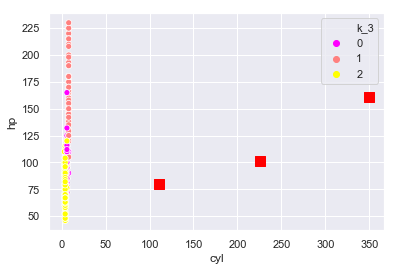

In [204]:
sns.scatterplot(x='cyl', y='hp', hue='k_3', data=ndf, palette='spring')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', label='Centroids')

In [205]:
km.inertia_

501614.02879346185

In [206]:
ndf.groupby('k_3').agg({'cyl':'median', 
                            'disp':'median', 
                            'acc':'median'})

,cyl,disp,acc
k_3,,,
0,6,231.0,16.4
1,8,350.0,13.0
2,4,107.0,16.0


In [207]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,6):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(ndf[['cyl', 'disp', 'hp']])
    
    #Add cluster information for each record in dataframe
    ndf['k_' + str(i)] = km.predict(ndf[['cyl', 'disp', 'hp']])
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

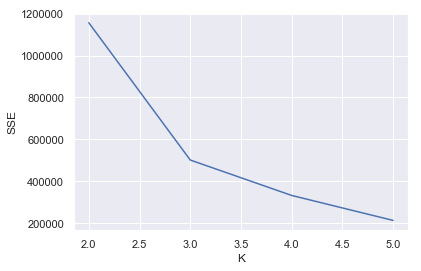

In [208]:
sns.lineplot(x='K', y='SSE', data=sse_df)

Elbow shows 3 Clusters are best

     cyl     hp   mpg
k_3                  
0      4   79.5  28.0
1      8  150.0  14.0
2      6  100.0  19.0


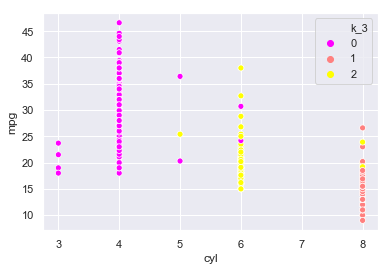

In [209]:
sns.scatterplot(x='cyl', y='mpg', hue='k_3', data=ndf, palette='spring')
print(ndf.groupby('k_3').agg({'cyl':'median', 'hp':'median', 'mpg':'median'}))

In [210]:
ndf.cyl.value_counts()
ndf=ndf.iloc[:,:7]


In [220]:
ndf[['cyl','disp','hp','wt','acc','mpg']]

,cyl,disp,hp,wt,acc,mpg
0,8,307.0,130.0,3504,12.0,18.0
1,8,350.0,165.0,3693,11.5,15.0
2,8,318.0,150.0,3436,11.0,18.0
3,8,304.0,150.0,3433,12.0,16.0
4,8,302.0,140.0,3449,10.5,17.0
5,8,429.0,198.0,4341,10.0,15.0
6,8,454.0,220.0,4354,9.0,14.0
7,8,440.0,215.0,4312,8.5,14.0
8,8,455.0,225.0,4425,10.0,14.0
9,8,390.0,190.0,3850,8.5,15.0


In [223]:
#Standardize
scaled_car_df = ndf.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_car_df[['disp','hp','wt','acc']]=scaler.fit_transform(scaled_car_df[['disp','hp','wt','acc']])
scaled_car_df=pd.DataFrame(scaled_car_df)
scaled_car_df.head()

C:\Users\kotav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kotav\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,cyl,disp,hp,wt,acc,yr,mpg
0,8,1.090604,0.669381,0.630870,-1.295498,70,18.0
1,8,1.503514,1.586783,0.854333,-1.477038,70,15.0
2,8,1.196232,1.193611,0.550470,-1.658577,70,18.0
3,8,1.061796,1.193611,0.546923,-1.295498,70,16.0
4,8,1.042591,0.931496,0.565841,-1.840117,70,17.0


In [226]:
scaled_car_df.columns=ndf.columns
scaled_car_df.head()


,cyl,disp,hp,wt,acc,yr,mpg
0,8,1.090604,0.669381,0.630870,-1.295498,70,18.0
1,8,1.503514,1.586783,0.854333,-1.477038,70,15.0
2,8,1.196232,1.193611,0.550470,-1.658577,70,18.0
3,8,1.061796,1.193611,0.546923,-1.295498,70,16.0
4,8,1.042591,0.931496,0.565841,-1.840117,70,17.0


In [228]:
cyl4_df=scaled_car_df.loc[scaled_car_df['cyl']==4]
cyl4_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
14,4,-0.772295,-0.248021,-0.707544,-0.206262,70,24.0
18,4,-0.925936,-0.431502,-0.993671,-0.387801,70,27.0
19,4,-0.925936,-1.532384,-1.342463,1.790672,70,26.0
20,4,-0.801103,-0.457713,-0.352841,0.701436,70,25.0
21,4,-0.829911,-0.379079,-0.638968,-0.387801,70,24.0


In [229]:
cyl6_df=scaled_car_df.loc[scaled_car_df['cyl']==6]
cyl6_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
15,6,0.043923,-0.248021,-0.162483,-0.024722,70,22.0
16,6,0.053526,-0.195598,-0.232242,-0.024722,70,18.0
17,6,0.063128,-0.510136,-0.453340,0.156817,70,21.0
24,6,0.053526,-0.379079,-0.381217,-0.206262,70,21.0
33,6,0.370411,-0.116964,-0.397770,-0.932419,71,19.0


In [230]:
cyl8_df=scaled_car_df.loc[scaled_car_df['cyl']==8]
cyl8_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,1.090604,0.669381,0.630870,-1.295498,70,18.0
1,8,1.503514,1.586783,0.854333,-1.477038,70,15.0
2,8,1.196232,1.193611,0.550470,-1.658577,70,18.0
3,8,1.061796,1.193611,0.546923,-1.295498,70,16.0
4,8,1.042591,0.931496,0.565841,-1.840117,70,17.0


# Cluster 1 with 4 cylinders

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=cyl4_df.drop(['mpg'],axis=1)
y=cyl4_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [246]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'].sort_values()
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:',r_sq)
y_pred = regressor.predict(X_test)
print('predicted response:', y_pred, sep='\n')
coeff_df['Coefficient'].sort_values()
y_pred_cal = regressor.intercept_ +( -6.460115 * X_test.disp)+(-5.130337*X_test.wt)+(-1.174804*X_test.hp)+(0.131931*X_test.acc)+(0.951663*X_test.yr)
print('predicted response:', y_pred_cal, sep='\n')

coefficient of determination: 0.6934215037616187
predicted response:
[27.84847395 30.90087961 26.20465924 24.59682544 28.97336509 27.90471587
 22.0313439  32.15965066 22.91608735 25.66944356 23.30063456 35.75698126
 34.26897462 37.55105502 30.13152168 24.97521878 26.53079842 36.0873065
 29.34369509 30.91713934 21.47344256 34.40335246 22.72272094 26.55646691
 21.74618634 32.47276975 36.10020781 28.2855153  38.66759654 31.99194875
 30.91940631 29.00533635 29.67739934 24.28097413 33.3544677  26.65280678
 32.40759521 31.17781019 21.5218845  35.69085927 32.54437454]
predicted response:
55     27.848499
129    30.900906
84     26.204685
110    24.596852
268    28.973393
219    27.904744
22     22.031369
301    32.159680
49     22.916113
336    25.669473
168    23.300662
378    35.757011
350    34.269004
344    37.551084
338    30.131551
29     24.975245
308    26.530828
310    36.087335
185    29.343722
175    30.917167
122    21.473469
326    34.403380
171    22.722748
314    26.556496
209 

Calculated response matches with predicted values

# Cluster 2 with cylinder 6

In [251]:
X=cyl6_df.drop(['mpg'],axis=1)
y=cyl6_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [252]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'].sort_values()
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:',r_sq)
y_pred = regressor.predict(X_test)
print('predicted response:', y_pred, sep='\n')
coeff_df['Coefficient'].sort_values()


coefficient of determination: 0.5329643488500289
predicted response:
[19.36928959 20.25893223 17.2356953  19.15921919 20.26913464 18.1443772
 19.39719606 22.95393977 16.51078202 16.8372141  20.6177736  17.10396484
 21.59666402 23.98580151 19.4542187  19.41126475 21.87379684]


wt     -3.821331
hp     -1.622718
acc    -1.393011
cyl     0.000000
yr      0.645430
disp    1.128989
Name: Coefficient, dtype: float64

In [253]:
y_pred_cal = regressor.intercept_ +( 1.128989 * X_test.disp)+(-3.821331*X_test.wt)+(-1.622718*X_test.hp)+(-1.393011*X_test.acc)+(0.645430*X_test.yr)
print('predicted response:', y_pred_cal, sep='\n')

predicted response:
155    19.369270
192    20.258912
199    17.235675
226    19.159199
127    20.269115
252    18.144357
17     19.397177
254    22.953918
135    16.510762
37     16.837195
284    20.617753
98     17.103946
280    21.596643
362    23.985779
101    19.454199
152    19.411245
360    21.873775
dtype: float64


Calculated response matches with predicted values

# Cluster 3 with cylinder 8

In [255]:
X=cyl8_df.drop(['mpg'],axis=1)
y=cyl8_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [256]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'].sort_values()
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:',r_sq)
y_pred = regressor.predict(X_test)
print('predicted response:', y_pred, sep='\n')
coeff_df['Coefficient'].sort_values()

coefficient of determination: 0.646724283686664
predicted response:
[13.97316183 13.26077175 15.04023126 12.64013367 16.59381401 16.98173172
 10.34131042 13.84980499 16.33976113 11.93532558 15.29805829 18.68126205
 18.32768264 17.99090782 12.40251858 12.56039172 10.49318382 10.54171592
 13.563399   12.58514135 12.09916158]


wt     -3.414544
hp     -1.073772
cyl     0.000000
yr      0.383385
acc     0.891209
disp    3.019366
Name: Coefficient, dtype: float64

In [257]:
y_pred_cal = regressor.intercept_ +( 3.019366 * X_test.disp)+(-3.414544*X_test.wt)+(-1.073772*X_test.hp)+(0.891209*X_test.acc)+(0.383385*X_test.yr)
print('predicted response:', y_pred_cal, sep='\n')

predicted response:
63     13.973169
138    13.260779
2      15.040239
104    12.640141
189    16.593822
214    16.981739
27     10.341317
159    13.849812
121    16.339769
95     11.935333
115    15.298066
288    18.681270
291    18.327691
13     17.990915
7      12.402526
67     12.560399
42     10.493191
44     10.541723
70     13.563406
8      12.585148
90     12.099169
dtype: float64


Calculated response matches with predicted values